## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548


0:	learn: 0.9834355	total: 48.6ms	remaining: 48.6s
1:	learn: 0.9633279	total: 50ms	remaining: 25s
2:	learn: 0.9426920	total: 51.1ms	remaining: 17s
3:	learn: 0.9246247	total: 52.3ms	remaining: 13s
4:	learn: 0.9088404	total: 53.5ms	remaining: 10.7s
5:	learn: 0.8942141	total: 54.8ms	remaining: 9.07s
6:	learn: 0.8781801	total: 55.8ms	remaining: 7.92s
7:	learn: 0.8614402	total: 56.8ms	remaining: 7.04s
8:	learn: 0.8449207	total: 57.8ms	remaining: 6.37s
9:	learn: 0.8269588	total: 59.2ms	remaining: 5.86s
10:	learn: 0.8113548	total: 60.3ms	remaining: 5.42s
11:	learn: 0.7956717	total: 61.2ms	remaining: 5.03s
12:	learn: 0.7811403	total: 62.3ms	remaining: 4.73s
13:	learn: 0.7650582	total: 63.4ms	remaining: 4.47s
14:	learn: 0.7510340	total: 64.5ms	remaining: 4.24s
15:	learn: 0.7361775	total: 65.5ms	remaining: 4.03s
16:	learn: 0.7229637	total: 68.8ms	remaining: 3.98s
17:	learn: 0.7088580	total: 70.2ms	remaining: 3.83s
18:	learn: 0.6960782	total: 71.2ms	remaining: 3.67s
19:	learn: 0.6848251	total: 72

120:	learn: 0.2737550	total: 181ms	remaining: 1.31s
121:	learn: 0.2721950	total: 182ms	remaining: 1.31s
122:	learn: 0.2713477	total: 183ms	remaining: 1.31s
123:	learn: 0.2702184	total: 185ms	remaining: 1.3s
124:	learn: 0.2690585	total: 186ms	remaining: 1.3s
125:	learn: 0.2679785	total: 187ms	remaining: 1.29s
126:	learn: 0.2664092	total: 188ms	remaining: 1.29s
127:	learn: 0.2653212	total: 189ms	remaining: 1.28s
128:	learn: 0.2640836	total: 190ms	remaining: 1.28s
129:	learn: 0.2631781	total: 191ms	remaining: 1.28s
130:	learn: 0.2619457	total: 192ms	remaining: 1.27s
131:	learn: 0.2607059	total: 193ms	remaining: 1.27s
132:	learn: 0.2595745	total: 194ms	remaining: 1.26s
133:	learn: 0.2586042	total: 195ms	remaining: 1.26s
134:	learn: 0.2574278	total: 196ms	remaining: 1.25s
135:	learn: 0.2560384	total: 197ms	remaining: 1.25s
136:	learn: 0.2551636	total: 198ms	remaining: 1.25s
137:	learn: 0.2539863	total: 199ms	remaining: 1.24s
138:	learn: 0.2531093	total: 200ms	remaining: 1.24s
139:	learn: 0.

248:	learn: 0.1874814	total: 315ms	remaining: 951ms
249:	learn: 0.1869917	total: 317ms	remaining: 950ms
250:	learn: 0.1862906	total: 318ms	remaining: 948ms
251:	learn: 0.1859089	total: 319ms	remaining: 946ms
252:	learn: 0.1856942	total: 320ms	remaining: 944ms
253:	learn: 0.1852861	total: 321ms	remaining: 942ms
254:	learn: 0.1849745	total: 322ms	remaining: 940ms
255:	learn: 0.1846284	total: 323ms	remaining: 938ms
256:	learn: 0.1841112	total: 324ms	remaining: 936ms
257:	learn: 0.1838246	total: 325ms	remaining: 934ms
258:	learn: 0.1836541	total: 326ms	remaining: 933ms
259:	learn: 0.1832388	total: 327ms	remaining: 931ms
260:	learn: 0.1828059	total: 328ms	remaining: 929ms
261:	learn: 0.1821519	total: 329ms	remaining: 927ms
262:	learn: 0.1819291	total: 330ms	remaining: 925ms
263:	learn: 0.1814156	total: 331ms	remaining: 923ms
264:	learn: 0.1812425	total: 332ms	remaining: 921ms
265:	learn: 0.1809540	total: 333ms	remaining: 919ms
266:	learn: 0.1803704	total: 334ms	remaining: 918ms
267:	learn: 

375:	learn: 0.1465054	total: 449ms	remaining: 745ms
376:	learn: 0.1463273	total: 450ms	remaining: 744ms
377:	learn: 0.1462466	total: 451ms	remaining: 743ms
378:	learn: 0.1459054	total: 452ms	remaining: 741ms
379:	learn: 0.1456517	total: 453ms	remaining: 740ms
380:	learn: 0.1454419	total: 454ms	remaining: 738ms
381:	learn: 0.1451583	total: 455ms	remaining: 736ms
382:	learn: 0.1450727	total: 456ms	remaining: 735ms
383:	learn: 0.1450322	total: 457ms	remaining: 733ms
384:	learn: 0.1447255	total: 458ms	remaining: 732ms
385:	learn: 0.1443908	total: 459ms	remaining: 730ms
386:	learn: 0.1443049	total: 460ms	remaining: 729ms
387:	learn: 0.1442436	total: 461ms	remaining: 727ms
388:	learn: 0.1438653	total: 462ms	remaining: 726ms
389:	learn: 0.1434423	total: 463ms	remaining: 724ms
390:	learn: 0.1430916	total: 464ms	remaining: 723ms
391:	learn: 0.1425957	total: 465ms	remaining: 721ms
392:	learn: 0.1422726	total: 466ms	remaining: 720ms
393:	learn: 0.1419327	total: 467ms	remaining: 719ms
394:	learn: 

502:	learn: 0.1143215	total: 579ms	remaining: 572ms
503:	learn: 0.1141025	total: 580ms	remaining: 571ms
504:	learn: 0.1139219	total: 581ms	remaining: 570ms
505:	learn: 0.1136659	total: 582ms	remaining: 569ms
506:	learn: 0.1135280	total: 583ms	remaining: 567ms
507:	learn: 0.1133097	total: 584ms	remaining: 566ms
508:	learn: 0.1130881	total: 585ms	remaining: 565ms
509:	learn: 0.1129779	total: 586ms	remaining: 563ms
510:	learn: 0.1128567	total: 587ms	remaining: 562ms
511:	learn: 0.1125718	total: 588ms	remaining: 561ms
512:	learn: 0.1122419	total: 589ms	remaining: 560ms
513:	learn: 0.1121031	total: 590ms	remaining: 558ms
514:	learn: 0.1119389	total: 592ms	remaining: 557ms
515:	learn: 0.1117008	total: 593ms	remaining: 556ms
516:	learn: 0.1113949	total: 594ms	remaining: 555ms
517:	learn: 0.1112156	total: 595ms	remaining: 553ms
518:	learn: 0.1109150	total: 596ms	remaining: 552ms
519:	learn: 0.1106986	total: 597ms	remaining: 551ms
520:	learn: 0.1104042	total: 598ms	remaining: 550ms
521:	learn: 

629:	learn: 0.0921766	total: 709ms	remaining: 416ms
630:	learn: 0.0920265	total: 710ms	remaining: 415ms
631:	learn: 0.0919377	total: 712ms	remaining: 414ms
632:	learn: 0.0917927	total: 713ms	remaining: 413ms
633:	learn: 0.0915661	total: 714ms	remaining: 412ms
634:	learn: 0.0913324	total: 715ms	remaining: 411ms
635:	learn: 0.0912201	total: 716ms	remaining: 410ms
636:	learn: 0.0910538	total: 717ms	remaining: 408ms
637:	learn: 0.0910106	total: 718ms	remaining: 407ms
638:	learn: 0.0909262	total: 719ms	remaining: 406ms
639:	learn: 0.0907315	total: 720ms	remaining: 405ms
640:	learn: 0.0905675	total: 721ms	remaining: 404ms
641:	learn: 0.0902885	total: 722ms	remaining: 403ms
642:	learn: 0.0900321	total: 723ms	remaining: 401ms
643:	learn: 0.0900072	total: 724ms	remaining: 400ms
644:	learn: 0.0897723	total: 725ms	remaining: 399ms
645:	learn: 0.0896852	total: 726ms	remaining: 398ms
646:	learn: 0.0895911	total: 727ms	remaining: 397ms
647:	learn: 0.0894638	total: 728ms	remaining: 396ms
648:	learn: 

755:	learn: 0.0748198	total: 840ms	remaining: 271ms
756:	learn: 0.0747452	total: 842ms	remaining: 270ms
757:	learn: 0.0745852	total: 843ms	remaining: 269ms
758:	learn: 0.0743331	total: 844ms	remaining: 268ms
759:	learn: 0.0742764	total: 845ms	remaining: 267ms
760:	learn: 0.0741338	total: 846ms	remaining: 266ms
761:	learn: 0.0739015	total: 847ms	remaining: 264ms
762:	learn: 0.0737784	total: 848ms	remaining: 263ms
763:	learn: 0.0737515	total: 849ms	remaining: 262ms
764:	learn: 0.0736486	total: 850ms	remaining: 261ms
765:	learn: 0.0735010	total: 851ms	remaining: 260ms
766:	learn: 0.0733428	total: 852ms	remaining: 259ms
767:	learn: 0.0732582	total: 853ms	remaining: 258ms
768:	learn: 0.0731538	total: 854ms	remaining: 257ms
769:	learn: 0.0731086	total: 855ms	remaining: 256ms
770:	learn: 0.0729609	total: 856ms	remaining: 254ms
771:	learn: 0.0728666	total: 858ms	remaining: 253ms
772:	learn: 0.0727349	total: 859ms	remaining: 252ms
773:	learn: 0.0726494	total: 860ms	remaining: 251ms
774:	learn: 

882:	learn: 0.0616207	total: 974ms	remaining: 129ms
883:	learn: 0.0615637	total: 975ms	remaining: 128ms
884:	learn: 0.0614756	total: 976ms	remaining: 127ms
885:	learn: 0.0613956	total: 977ms	remaining: 126ms
886:	learn: 0.0612792	total: 978ms	remaining: 125ms
887:	learn: 0.0612253	total: 980ms	remaining: 124ms
888:	learn: 0.0611529	total: 981ms	remaining: 122ms
889:	learn: 0.0610082	total: 982ms	remaining: 121ms
890:	learn: 0.0608837	total: 983ms	remaining: 120ms
891:	learn: 0.0608379	total: 984ms	remaining: 119ms
892:	learn: 0.0607765	total: 985ms	remaining: 118ms
893:	learn: 0.0607103	total: 986ms	remaining: 117ms
894:	learn: 0.0606898	total: 987ms	remaining: 116ms
895:	learn: 0.0605375	total: 988ms	remaining: 115ms
896:	learn: 0.0604626	total: 989ms	remaining: 114ms
897:	learn: 0.0604155	total: 990ms	remaining: 112ms
898:	learn: 0.0603546	total: 991ms	remaining: 111ms
899:	learn: 0.0603364	total: 992ms	remaining: 110ms
900:	learn: 0.0602596	total: 993ms	remaining: 109ms
901:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

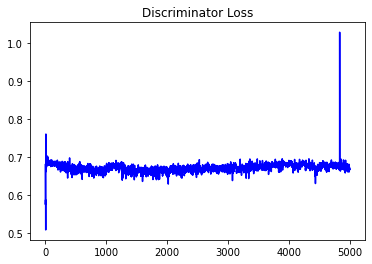

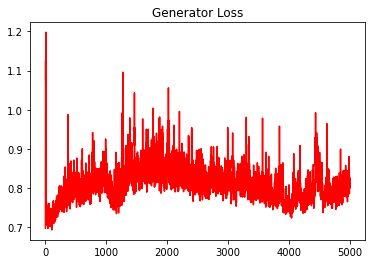

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

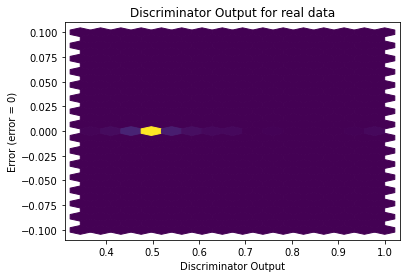

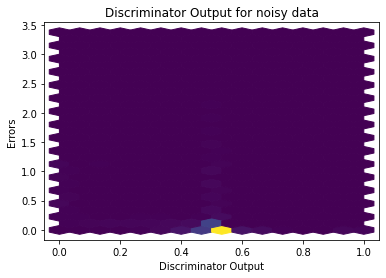

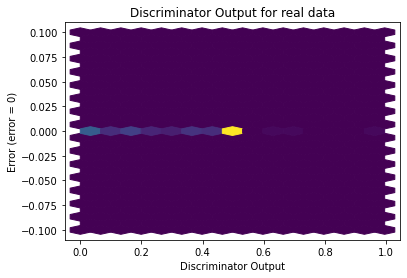

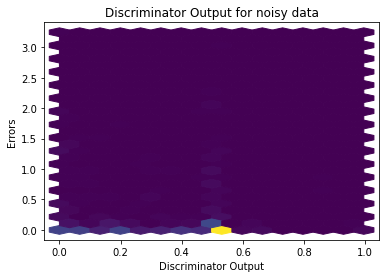

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


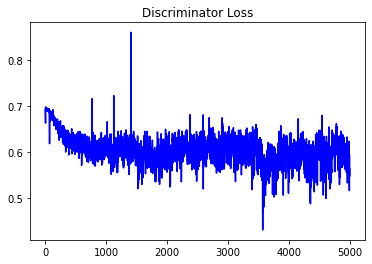

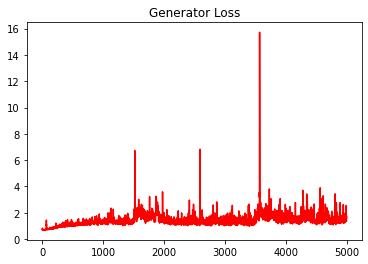

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

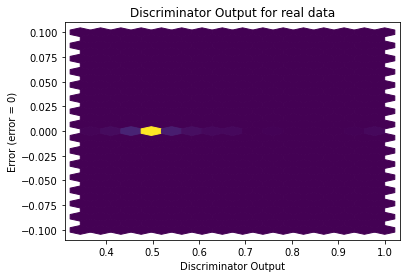

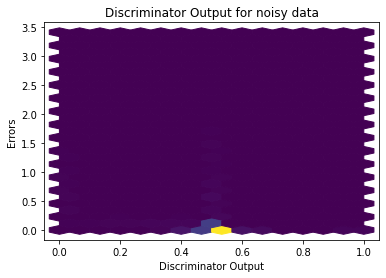

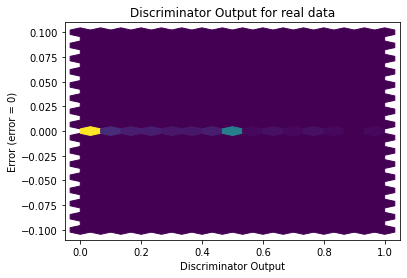

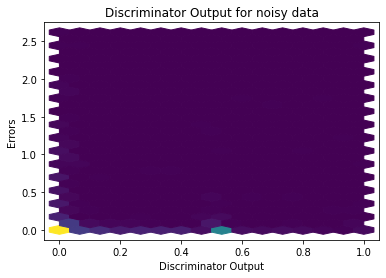

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9959]], device='cuda:0', requires_grad=True)
